In [20]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import numpy as np
import pandas as pd
import sys
sys.path.append(root + 'python')
import nutrecon_simulation as sim
from variableCoding import Vars
_v_ = Vars()

import plotly.express as px

Running Code locally


# Testing Functions & routines

## Task parameters

In [21]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# # ---------------------------- Levy & Glimcher ------------------------------

# # Same-type & mixed type Trials Lottery probabilities
# st_refPs = [1]                                  # Reference option
# st_lottPs = [0.13, 0.22, 0.38, .50, .75]        # Lottery option

# # Same-type task variables
# st_money_refQs = [2]                            # Dolars
# st_money_lottQs = [2, 4.5, 10, 22.5, 50]        # Dolars

# st_cPlus_refQs = [5]                            # candies
# st_cPlus_lottQs = [5, 10, 20, 40, 80]           # candies
# # st_cPlus_refQs = [2]                          # crackers
# # st_cPlus_lottQs = [2, 5, 10, 20, 40]          # crackers

# st_cMinus_refQs = [60]                          # mL water
# st_cMinus_lottQs = [60, 125, 250, 500, 1000]    # mL water

# # Mixed-type task variables
# mt_refQs = [.2]                                 # Dolars
# mt_refPs = [1]
# mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

# mt_cPlus_lottQs = [10, 20, 30, 50,  80]         # candies
# # mt_cPlus_lottQs = [5, 10, 15, 25,  40]        # candies
# mt_cMinus_lottQs = [125, 250, 400, 600,  1000]  # water 

# -------------------------------- NUTRECON ---------------------------------

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Subject specific parameters

In [3]:
# Subject specific parameters
st_money_alpha = 0.7
st_cPlus_alpha = 0.5
st_cMinus_alpha = 0.4

st_money_beta = 2.5
st_cPlus_beta = st_money_beta
st_cMinus_beta = st_money_beta

mt_cPlus_beta = st_money_beta
mt_cMinus_beta = st_money_beta

cPlus_sFactor = .8
cMinus_sFactor = .8

subjectTrials_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, 
                                              st_cPlus_beta, st_cMinus_beta, mt_cPlus_beta, mt_cMinus_beta, 
                                              cPlus_sFactor, cMinus_sFactor, 
                                              allTrials_df)
subjectTrials_df


,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,ref_alpha,lott_alpha,beta,sFactor
0,same,Money,1.0,1,Money,1,0.13,0.7,0.7,2.5,1.0
1,same,Money,1.0,1,Money,1,0.22,0.7,0.7,2.5,1.0
2,same,Money,1.0,1,Money,1,0.38,0.7,0.7,2.5,1.0
3,same,Money,1.0,1,Money,1,0.50,0.7,0.7,2.5,1.0
4,same,Money,1.0,1,Money,1,0.75,0.7,0.7,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...
745,mixed,Money,0.2,1,CS-,200,0.13,0.7,0.4,2.5,0.8
746,mixed,Money,0.2,1,CS-,200,0.22,0.7,0.4,2.5,0.8
747,mixed,Money,0.2,1,CS-,200,0.38,0.7,0.4,2.5,0.8
748,mixed,Money,0.2,1,CS-,200,0.50,0.7,0.4,2.5,0.8


### Simulate choices

In [4]:
seed = 1
np.random.seed(seed)

In [5]:
subjectTrials_df = sim._get_subject_choices(subjectTrials_df)
beahviour_cols = sim.optimize_cols[:-4]

def get_probLottery(group):
  prob_lotteryChoice = len(group[group['choice'] == 1]) / uniqueLott_Nreps
  return prob_lotteryChoice

subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()

subject_choiceCount_df['trialType_rewType'] = subject_choiceCount_df['trial_type'] +' '+ subject_choiceCount_df['lott_type']

title = 'Choices'

hover_cols = ['lott_type']
hover_data = {key:False for key in subject_choiceCount_df.columns}

fig = px.line(subject_choiceCount_df, facet_col = 'lott_type', facet_row = 'trial_type',
            x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
            color='lott_prob',  markers=True,
            symbol = 'lott_prob', 
            color_discrete_sequence = px.colors.sequential.dense,
            hover_data = hover_data, 
            category_orders= {
                        'lottery p': sorted(list(subject_choiceCount_df[beahviour_cols[-2]].unique())),
                        }
                )
fig.update_layout(
    title = title,
    legend_title="Subject ID, reward",
)                                
fig.update_xaxes(matches=None)

fig.show()

## Parameter Estimation

In [6]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Likelihood calculation

In [7]:
# Checking if Likelihood calculation is working for simultaneous estimation and 6 parameters


df = subjectTrials_df.copy()

df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0_6params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [8]:
# Checking if Likelihood calculation is working for simultaneous estimation and 10 parameters


df = subjectTrials_df.copy()

df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0_10params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


Likelihood well calculated.


In [9]:
# Checking if Likelihood calculation is working for stepwise estimation and 6 parameters
df = subjectTrials_df.copy()

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    beta,
    cPlus_sFactor, cMinus_sFactor) = x0_6params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta)
mt_params = (cPlus_sFactor, cMinus_sFactor)


st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha
beta_est = st_money_beta

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est
df.loc[mt_mask, sim.optimize_cols[10]] = beta_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [10]:
# Checking if Likelihood calculation is working for stepwise estimation and 10 parameters

df = subjectTrials_df.copy()

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    st_money_beta, st_cPlus_beta, st_cMinus_beta,
    mt_cPlus_beta, mt_cMinus_beta,
    cPlus_sFactor, cMinus_sFactor) = x0_10params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta)
mt_params = (mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor)

st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']

if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


### Model Fit

In [11]:
# alphaMoney0 = st_money_alpha
# alphaCplus0 = st_cPlus_alpha
# alphaCminus0 = st_cMinus_alpha
# st_betaMoney0 = st_money_beta # also used in model with only one beta
# st_betaCplus0 = st_cPlus_beta
# st_betaCminus0 = st_cMinus_beta
# mt_betaCplus0 = mt_cPlus_beta
# mt_betaCminus0 = mt_cMinus_beta
# sFactorCplus0 = cPlus_sFactor
# sFactorCminus0= cMinus_sFactor

alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

In [12]:

args = (subjectTrials_df.copy())


res_st, res_mt, st_iterParams_df, mt_iterParams_df = sim.stepwise_estimate(args, x0_6params)



D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:43: RuntimeWarning:

overflow encountered in exp

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:43: RuntimeWarning:

overflow encountered in exp

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:43: RuntimeWarning:

overflow encountered in exp

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encoun

In [19]:
st_iterParams_df

,Money alpha,CS+ alpha,CS- alpha,beta
0,1.006915,0.635442,0.072887,0.833836
1,1.031890,0.717950,0.011220,0.942839
2,1.080239,0.646136,-0.014287,1.191127
3,1.007188,0.641383,-0.018955,1.226725
4,0.680721,0.612845,0.440088,2.222299
5,0.695519,0.613359,0.505806,2.301669
6,0.830113,0.638857,0.500396,2.354033
7,0.899088,0.664007,0.495163,2.557476
8,0.934477,0.664042,0.488495,2.855436
9,0.935661,0.659791,0.479464,3.494289


In [18]:
np.tan(0.461)

0.4966948563901386

In [15]:
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  Optimization terminated successfully.
    - parameters: [8.17120831e-01 6.33744283e-01 4.60892785e-01 5.24210119e+03]
  - std. error: [0.07286882 0.03524184 0.03000266 2.75447327]

Confidene intervals:
  - parameter 1: 0.817 ± 0.143
  - parameter 2: 0.634 ± 0.069
  - parameter 3: 0.461 ± 0.059
  - parameter 4: 5242.101 ± 5.399

Mixed type trials
  Optimization terminated successfully.
    - parameters: [1.22792815 1.03485963]
  - std. error: [0.25877215 0.15060702]

  Confidene intervals:
    - parameter 1: 1.228 ± 0.507
    - parameter 2: 1.035 ± 0.295


In [50]:
args = (subjectTrials_df.copy())
res_st, res_mt = sim.stepwise_estimate(args, x0_10params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.

In [51]:
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  NaN result encountered.
    - parameters: [1. 1. 1. 1. 1. 1.]
  - std. error: [1. 1. 1. 1. 1. 1.]

Confidene intervals:
  - parameter 1: 1.0 ± 1.96
  - parameter 2: 1.0 ± 1.96
  - parameter 3: 1.0 ± 1.96
  - parameter 4: 1.0 ± 1.96
  - parameter 5: 1.0 ± 1.96
  - parameter 6: 1.0 ± 1.96

Mixed type trials
  Desired error not necessarily achieved due to precision loss.
    - parameters: [7.59643839e-04 7.68670849e-04 3.00706064e+02 1.20265725e+02]
  - std. error: [1.16953471e-04 7.84973491e-05 2.87136786e-01 1.22870916e-01]

  Confidene intervals:
    - parameter 1: 0.001 ± 0.0
    - parameter 2: 0.001 ± 0.0
    - parameter 3: 300.706 ± 0.563
    - parameter 4: 120.266 ± 0.241


In [52]:
res = sim.simultaneous_estimate(args, x0_6params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.

In [53]:
sim.print_simultaneousModel_output(res)

NaN result encountered.
  - parameters: [1. 1. 1. 1. 1. 1.]
  - std. error: [1. 1. 1. 1. 1. 1.]

Confidene intervals:
  - parameter 1: 1.0 ± 1.96
  - parameter 2: 1.0 ± 1.96
  - parameter 3: 1.0 ± 1.96
  - parameter 4: 1.0 ± 1.96
  - parameter 5: 1.0 ± 1.96
  - parameter 6: 1.0 ± 1.96


In [ ]:
res = sim.simultaneous_estimate(args, x0_10params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.l

In [ ]:
sim.print_simultaneousModel_output(res)

Desired error not necessarily achieved due to precision loss.
  - parameters: [6.60772605e-01 8.44967993e-01 8.44119897e-01 1.85517988e+00
 3.71777455e+02 7.70333071e+01 2.66148130e-03 3.02040032e+00
 8.59764771e+01 1.39460227e-01]
  - std. error: [4.53192475e-02 1.08150826e-04 6.42717444e-04 3.31328430e-01
 7.61466405e+00 9.06893221e-01 4.56256523e-04 8.88762040e-01
 2.57293124e+00 3.31200268e-02]

Confidene intervals:
  - parameter 1: 0.661 ± 0.089
  - parameter 2: 0.845 ± 0.0
  - parameter 3: 0.844 ± 0.001
  - parameter 4: 1.855 ± 0.649
  - parameter 5: 371.777 ± 14.925
  - parameter 6: 77.033 ± 1.778
  - parameter 7: 0.003 ± 0.001
  - parameter 8: 3.02 ± 1.742
  - parameter 9: 85.976 ± 5.043
  - parameter 10: 0.139 ± 0.065


# Simulation

## Task Parameters

In [22]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Initialization Parameters

In [23]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Generate parameters per participant

In [28]:
from tqdm import tqdm
from numpy import random

N_iter = 2

# mean parameters
mean_st_money_alpha = 0.7
mean_st_cPlus_alpha = 0.8
mean_st_cMinus_alpha = 0.8
mean_st_money_beta = 1.8
mean_st_cPlus_beta = st_money_beta
mean_st_cMinus_beta = st_money_beta
mean_mt_cPlus_beta = st_money_beta
mean_mt_cMinus_beta = st_money_beta
mean_cPlus_sFactor = .2
mean_cMinus_sFactor = .2

std_st_money_alpha = 0.1
std_st_cPlus_alpha = 0.1
std_st_cMinus_alpha = 0.1
std_st_money_beta = 0.2
std_st_cPlus_beta = std_st_money_beta
std_st_cMinus_beta = std_st_money_beta
std_mt_cPlus_beta = std_st_money_beta
std_mt_cMinus_beta = st_money_beta
std_cPlus_sFactor = 0
std_cMinus_sFactor = 0

st_money_alpha_arr = random.normal(mean_st_money_alpha, std_st_money_alpha, N_iter)
st_cPlus_alpha_arr = random.normal(mean_st_cPlus_alpha, std_st_cPlus_alpha, N_iter)
st_cMinus_alpha_arr = random.normal(mean_st_cMinus_alpha, std_st_cMinus_alpha, N_iter)
st_money_beta_arr = random.normal(mean_st_money_beta, std_st_money_beta, N_iter)
st_cPlus_beta_arr = random.normal(mean_st_cPlus_beta, std_st_cPlus_beta, N_iter)
st_cMinus_beta_arr = random.normal(mean_st_cMinus_beta, std_st_cMinus_beta, N_iter)
mt_cPlus_beta_arr = random.normal(mean_mt_cPlus_beta, std_mt_cPlus_beta, N_iter)
mt_cMinus_beta_arr = random.normal(mean_mt_cMinus_beta, std_mt_cMinus_beta, N_iter)
cPlus_sFactor_arr = random.normal(mean_cPlus_sFactor, std_cPlus_sFactor, N_iter)
cMinus_sFactor_arr = random.normal(mean_cMinus_sFactor, std_cMinus_sFactor, N_iter)

st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr,
                    ] )

mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                    cPlus_sFactor_arr, cMinus_sFactor_arr])

st_flags = []
mt_flags = []

st_estPars = np.zeros((4, N_iter))
mt_estPars = np.zeros((2, N_iter))
st_hessians = np.zeros((4, 4, N_iter))
mt_hessians = np.zeros((2, 2, N_iter))

import warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(N_iter)):
    # Generate alphas per participant
    st_money_alpha = st_money_alpha_arr[i]
    st_cPlus_alpha = st_cPlus_alpha_arr[i]
    st_cMinus_alpha = st_cMinus_alpha_arr[i]
    st_money_beta = st_money_beta_arr[i]
    st_cPlus_beta = st_cPlus_beta_arr[i]
    st_cMinus_beta = st_cMinus_beta_arr[i]
    mt_cPlus_beta = mt_cPlus_beta_arr[i]
    mt_cMinus_beta = mt_cMinus_beta_arr[i]
    cPlus_sFactor = cPlus_sFactor_arr[i]
    cMinus_sFactor = cMinus_sFactor_arr[i]

    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                  cPlus_sFactor, cMinus_sFactor, 
                                                  allTrials_df)
    
    res_st, res_mt, _st_iterParams_df, _mt_iterParams_df = sim.stepwise_estimate(subjectTrials_df, x0_6params)

    _st_iterParams_df = _st_iterParams_df.reset_index().rename(columns={'index':'estim. iter'},)
    _st_iterParams_df['iter'] = i
    
    _mt_iterParams_df = _mt_iterParams_df.reset_index().rename(columns={'index':'estim. iter'},)
    _mt_iterParams_df['iter'] = i

    if i == 0:
        st_iterParams_df = _st_iterParams_df
        mt_iterParams_df = _mt_iterParams_df
    else:
        st_iterParams_df = pd.concat([st_iterParams_df, _st_iterParams_df], axis = 0)
        mt_iterParams_df = pd.concat([mt_iterParams_df, _mt_iterParams_df], axis = 0)


    
    st_flags.append(res_st.success)
    mt_flags.append(res_mt.success)

    st_estPars[:, i] = res_st.x
    st_hessians[:, :, i] = res_st.hess_inv
    mt_estPars[:, i] = res_mt.x
    mt_hessians[:, :, i] = res_mt.hess_inv





100%|██████████| 2/2 [00:10<00:00,  5.35s/it]


In [29]:
st_iterParams_df

,estim. iter,Money alpha,CS+ alpha,CS- alpha,beta,iter
0,0,0.943135,0.980212,0.874002,1.005854,0
1,1,0.587369,0.938554,0.874209,1.187069,0
2,2,0.547080,0.999666,0.841619,1.375240,0
3,3,0.543788,0.949271,0.814021,1.597761,0
4,4,0.637685,0.915489,0.822810,1.962346,0
...,...,...,...,...,...,...
30,30,0.667920,0.954623,0.820788,1726.633631,1
31,31,0.668001,0.954649,0.820811,3020.624072,1
32,32,0.667859,0.954605,0.820769,4317.625797,1
33,33,0.667908,0.954618,0.820784,4317.647928,1


In [216]:
np.log(-1)

nan

In [210]:
import matplotlib.pyplot as plt

In [211]:
st_estPars.shape

(4, 10)

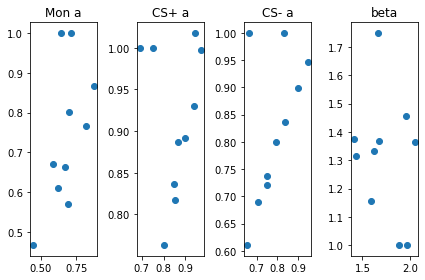

In [212]:
fig, ax = plt.subplots(ncols = 4)
titles = ['Mon a', 'CS+ a', 'CS- a', 'beta']

for p in range(4):
    alphas = st_pars[p,:]
    est_alphas = st_estPars[p, :]
    ax[p].scatter(alphas, est_alphas)
    ax[p].set_title(titles[p])

plt.tight_layout()

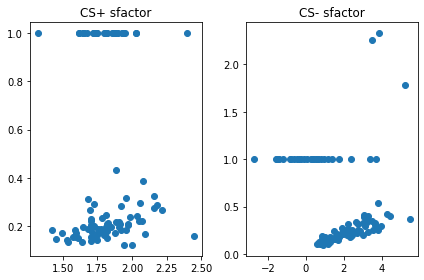

In [129]:
fig, ax = plt.subplots(ncols = 2)
titles = ['CS+ sfactor', 'CS- sfactor']

for p in range(2):
    alphas = mt_pars[p,:]
    est_alphas = mt_estPars[p,:]
    ax[p].scatter(alphas, est_alphas)
    ax[p].set_title(titles[p])

plt.tight_layout()

In [56]:
mt_estPars[flags,:]



TypeError: bad operand type for unary ~: 'list'